# Práctica 1 Manejo básico de imágenes y visualización Iris Setosa

## Ejercicios Parte A Imágenes

De la carpeta de imágenes: realiza las siguientes actividades.

In [94]:
import os
import matplotlib.pyplot as plt

imagenes = os.listdir('./Imagenes')
print(imagenes)

['Anonymized20200210.dcm', 'cameraman.tif', 'house.tif', 'IM-0001-0007.dcm', 'lake.tif', 'lena_color_512.tif', 'peppers_color.tif', 'rosa800x600.raw']


**4.1** Desarrolla un script para leer y desplegar cada imagen con los paquetes de `Matplotlib`, `OpenCV`, `Scikit-Image` y `PIL`.

### MatplotLib

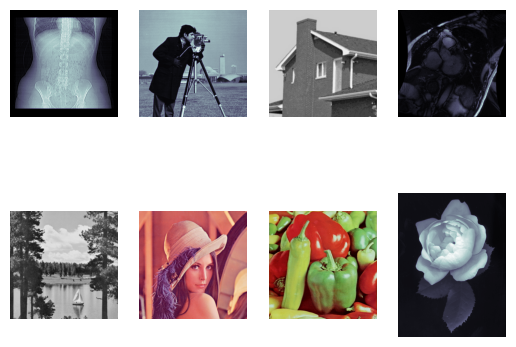

In [95]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pydicom

fig = plt.figure(1)
rows = 2
cols = 4
i = 1



for image_path in imagenes:
    ext = image_path.split('.')[-1]
    full_path = f'.\\Imagenes\\'+image_path

    img = None
    if ext == 'tif':
        img = mpimg.imread(full_path)
    elif ext == 'dcm':
        img = pydicom.dcmread(full_path)
        img = img.pixel_array
    elif ext == 'raw':
        img = np.fromfile(full_path, dtype=np.uint8)
        img = img.reshape((800,600))
    else:
        print("Formato de imagen no soportado")
    
    if img.any() != None:
        fig.add_subplot(rows,cols,i)
        i+=1
        plt.axis('off')
        plt.imshow(img,cmap=plt.cm.bone)

### OpenCV

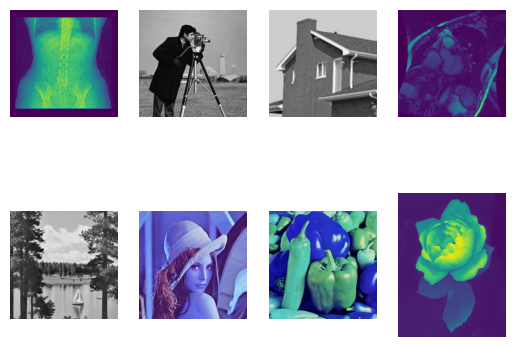

In [96]:
import cv2

fig = plt.figure(2)
rows = 2
cols = 4
i = 1

for image_path in imagenes:
    ext = image_path.split('.')[-1]
    full_path = f'.\\Imagenes\\'+image_path

    img = None
    if ext == 'tif':
        img = cv2.imread(full_path)
    elif ext == 'dcm':
        img = pydicom.dcmread(full_path)
        img = img.pixel_array
    elif ext == 'raw':
        img = np.fromfile(full_path, dtype=np.uint8)
        img = img.reshape((800,600))
    else:
        print("Formato de imagen no soportado")
    
    if img.any() != None:
        fig.add_subplot(rows,cols,i)
        i+=1
        plt.axis('off')
        plt.imshow(img)

### Scikit

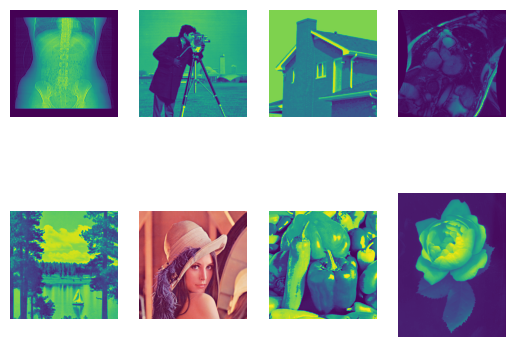

In [97]:
from skimage import io

fig = plt.figure(3)
rows = 2
cols = 4
i = 1

for image_path in imagenes:
    ext = image_path.split('.')[-1]
    full_path = f'.\\Imagenes\\'+image_path

    img = None
    if ext == 'tif':
        img = io.imread(full_path)
    elif ext == 'dcm':
        img = pydicom.dcmread(full_path)
        img = img.pixel_array
    elif ext == 'raw':
        img = np.fromfile(full_path, dtype=np.uint8)
        img = img.reshape((800,600))
    else:
        print("Formato de imagen no soportado")
    
    if img.any() != None:
        fig.add_subplot(rows,cols,i)
        i+=1
        plt.axis('off')
        if len(img.shape) > 2 and img.shape[2] < 3:

            plt.imshow(img[:,:,0])
        else:
            plt.imshow(img)

### PIL

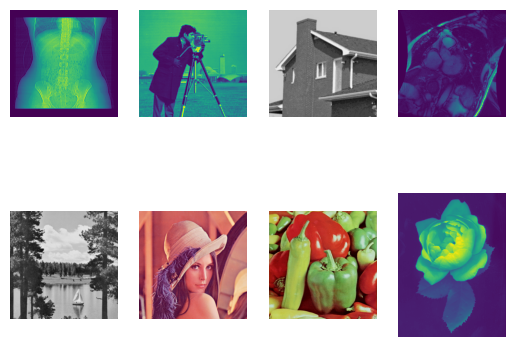

In [98]:
from PIL import Image

fig = plt.figure(2)
rows = 2
cols = 4
i = 1

for image_path in imagenes:
    ext = image_path.split('.')[-1]
    full_path = f'.\\Imagenes\\'+image_path

    img = None
    if ext == 'tif':
        img = Image.open(full_path)
    elif ext == 'dcm':
        img = pydicom.dcmread(full_path)
        img = img.pixel_array
    elif ext == 'raw':
        img = np.fromfile(full_path, dtype=np.uint8)
        img = img.reshape((800,600))
    else:
        print("Formato de imagen no soportado")
    

    fig.add_subplot(rows,cols,i)
    i+=1
    plt.axis('off')
    plt.imshow(img)

**4.2** Imprima el tipo de imagen, el tamaño y el tipo de dato.

In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pydicom

fig = plt.figure(1)
rows = 2
cols = 4
i = 1



for image_path in imagenes:
    ext = image_path.split('.')[-1]
    full_path = f'.\\Imagenes\\'+image_path

    img = None
    if ext == 'tif':
        img = mpimg.imread(full_path)
    elif ext == 'dcm':
        img = pydicom.dcmread(full_path)
        img = img.pixel_array
    elif ext == 'raw':
        img = np.fromfile(full_path, dtype=np.uint8)
        img = img.reshape((800,600))
    else:
        print("Formato de imagen no soportado")
    
    if img.any() != None:
        print("-"*23)
        print("Imagen: "+image_path)
        print("Extensión: " + ext)
        print("Tamaño: "+str(img.shape))
        print("Tipo de dato: "+str(img.dtype))

-----------------------
Imagen: Anonymized20200210.dcm
Extensión: dcm
Tamaño: (512, 512)
Tipo de dato: uint8
-----------------------
Imagen: cameraman.tif
Extensión: tif
Tamaño: (512, 512)
Tipo de dato: uint8
-----------------------
Imagen: house.tif
Extensión: tif
Tamaño: (512, 512, 4)
Tipo de dato: uint8
-----------------------
Imagen: IM-0001-0007.dcm
Extensión: dcm
Tamaño: (256, 256)
Tipo de dato: int16
-----------------------
Imagen: lake.tif
Extensión: tif
Tamaño: (512, 512, 4)
Tipo de dato: uint8
-----------------------
Imagen: lena_color_512.tif
Extensión: tif
Tamaño: (512, 512, 3)
Tipo de dato: uint8
-----------------------
Imagen: peppers_color.tif
Extensión: tif
Tamaño: (512, 512, 4)
Tipo de dato: uint8
-----------------------
Imagen: rosa800x600.raw
Extensión: raw
Tamaño: (800, 600)
Tipo de dato: uint8


<Figure size 640x480 with 0 Axes>

**4.3** De las imágenes _"lena_color_512.tif"_, _"peppers_color.tif"_. Desarrolla un script con OpenCV y Scikit-Image para cambiar el espacio de color de:

> **4.3.1** RGB a Escala de Grises

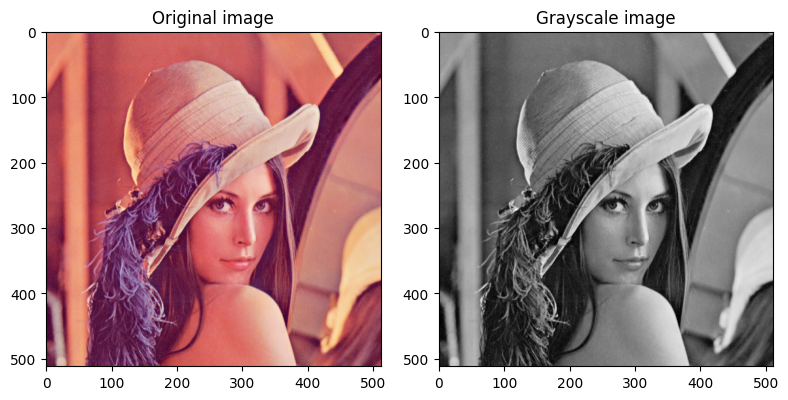

In [100]:
from skimage.color import rgb2gray

#RGB a grises Scikitimage
path = ".\Imagenes\lena_color_512.tif"
orig_img = io.imread(path)
grayscale_img = rgb2gray(orig_img)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(orig_img)
ax[0].set_title("Original image")
ax[1].imshow(grayscale_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale image")
fig.tight_layout()
plt.show()

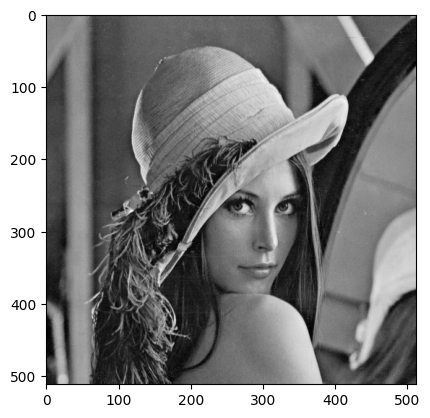

In [101]:
import cv2
import matplotlib.pyplot as plt

IMAGE_PATH = f'.\\Imagenes\\'

#RGB a grises OpenCv
img_gray_mode = cv2.imread(IMAGE_PATH+"lena_color_512.tif", cv2.COLOR_BGR2RGB)
img_gray_mode = cv2.cvtColor(img_gray_mode, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray_mode, cmap=plt.cm.gray)
plt.show()


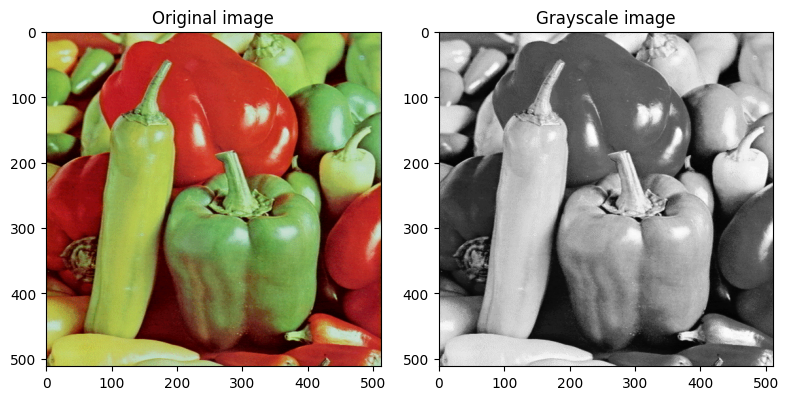

In [102]:

path = ".\Imagenes\peppers_color.tif"
orig_img = plt.imread(path)
grayscale_img = rgb2gray(orig_img[:,:,:3])
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(orig_img)
ax[0].set_title("Original image")
ax[1].imshow(grayscale_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale image")
fig.tight_layout()
plt.show()

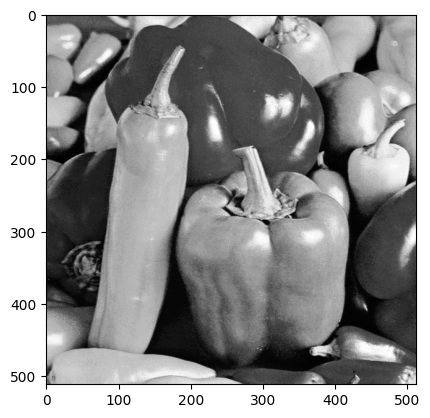

In [103]:
#RGB a grises OpenCv
img_gray_mode = cv2.imread(IMAGE_PATH+"peppers_color.tif", cv2.COLOR_BGR2RGB)
img_gray_mode = cv2.cvtColor(img_gray_mode, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray_mode, cmap=plt.cm.gray)
plt.show()

**4.3.2** RGB a YUV

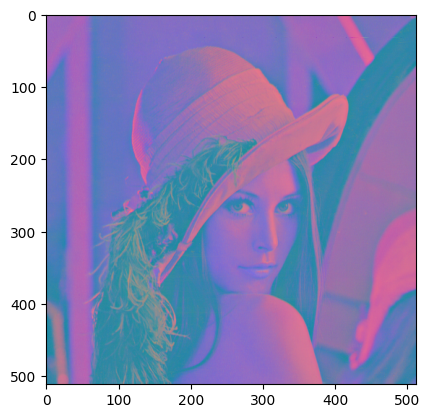

In [104]:
# RGB a YUV OpenCv

from skimage.color import rgb2yuv

# RGB a YUV scikit
def rgbAyuvScikit(img_path):
  orig_img = plt.imread(IMAGE_PATH+img_path)
  img=rgb2yuv(orig_img)
  plt.imshow(img)
  plt.show()

def rgbAyuvOpenCV(img_path):
  img_bgr = cv2.imread(IMAGE_PATH+img_path)
  img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)
  plt.imshow(img_yuv)
  plt.show()

rgbAyuvOpenCV("lena_color_512.tif")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


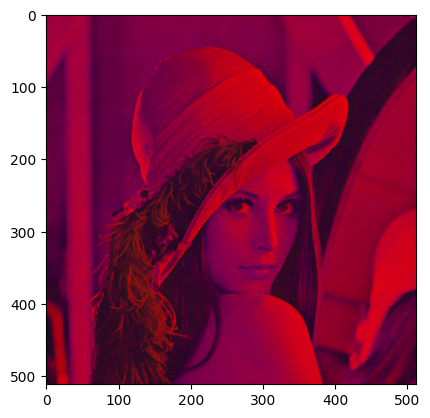

In [105]:
rgbAyuvScikit("lena_color_512.tif")

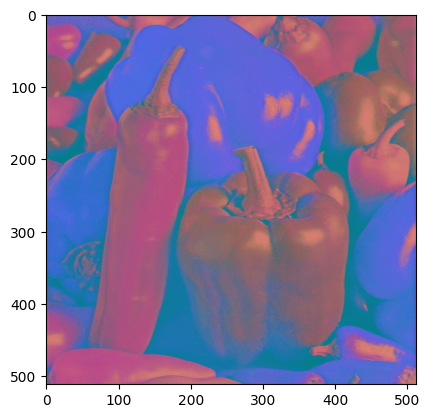

In [106]:
rgbAyuvOpenCV("peppers_color.tif")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


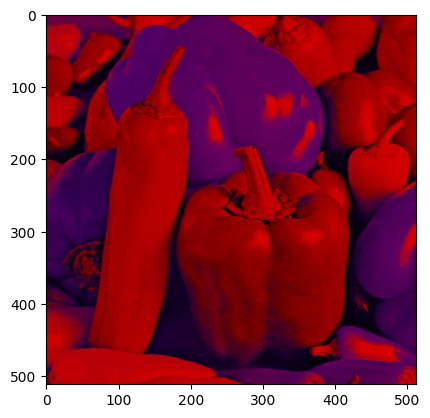

In [107]:
orig_img = plt.imread(IMAGE_PATH+"peppers_color.tif")
img=rgb2yuv(orig_img[:,:,:3])
plt.imshow(img)
plt.show()

**4.3.3** RGB a HSV

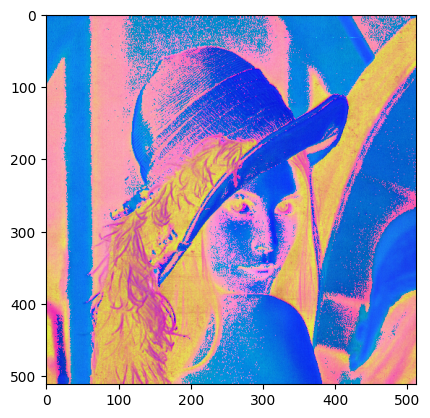

In [108]:
from skimage.color import rgb2hsv

# RGB a HSV
def rgbAhsvScikit(img_path):
  orig_img = plt.imread(IMAGE_PATH+img_path)
  img= rgb2hsv(orig_img[:,:,:3])
  plt.imshow(img)
  plt.show()

def rgbAhsvOpenCV(img_path):
  img_bgr = cv2.imread(IMAGE_PATH+img_path)
  img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
  plt.imshow(img_hsv)
  plt.show()
  
rgbAhsvScikit('lena_color_512.tif')


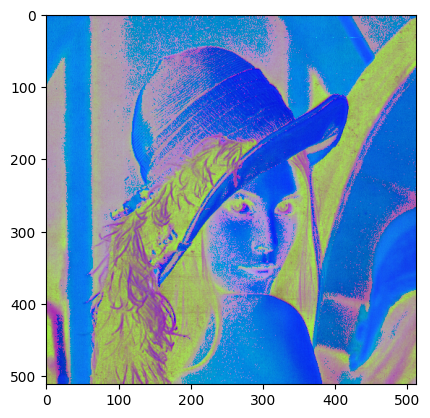

In [109]:
rgbAhsvOpenCV('lena_color_512.tif')

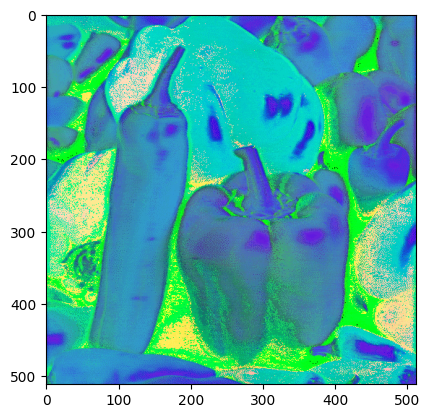

In [110]:
rgbAhsvScikit('peppers_color.tif')

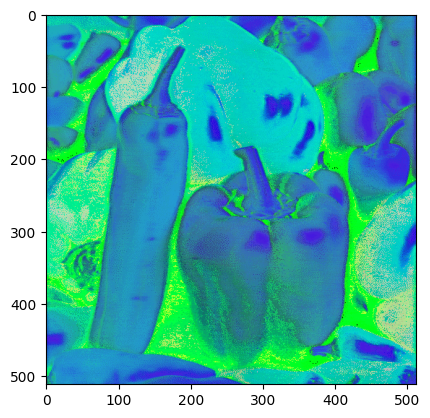

In [111]:
rgbAhsvOpenCV('peppers_color.tif')

**4.4** Despliega la paleta de colores de RGB por separado, ver figura siguiente, la barra de la derecha con valores es la paleta de colores

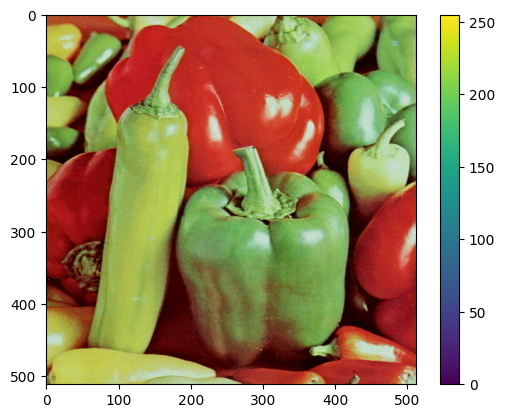

In [112]:
from matplotlib import cm
# rgb = cm.get_cmap('rgb')

img = plt.imread(IMAGE_PATH+'peppers_color.tif')
plt.imshow(img)
plt.colorbar()
plt.show()


**4.5** De una imagen que usted escoja, dejarla en escala de grises y procure que sea igual en renglones y en columnas. Programe una función que realice decimación de una imagen, reduciéndola a la mitad de su tamaño original. Y promediando en grupos de 4 pixeles. Pruebe con su imagen.

(256, 256)


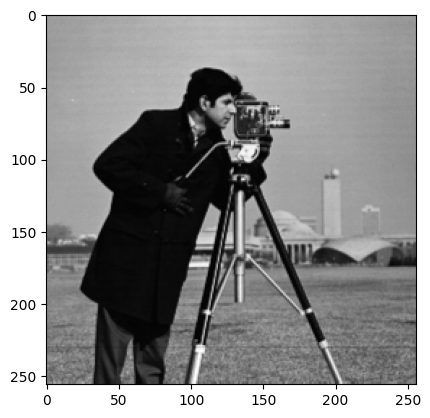

In [113]:
from statistics import mean


def decimacion(img_path):
  img = plt.imread(IMAGE_PATH+img_path)
  
  x,y = img.shape
  
  new_img = np.zeros(shape=(x//2,y//2))
  
  for i in range(0,y-1,2):
    for j in range(0,x-1,2):
      m = mean([img[j,i],img[j+1,i],img[j,i+1],img[j+1,i+1]])
      
      
      new_img[j//2,i//2] = m
  
  return new_img
  
  
test = decimacion('cameraman.tif')
print(test.shape)
plt.imshow(test, cmap=plt.cm.gray)
plt.show()

**4.6** Convierte la imagen peppers_color.tif a escala de grises.

> **4.6.1** Recórtela de manera que solo quede uno de los pimientos verdes en ese recorte

> **4.6.2** Guárdela en formato .jpg.

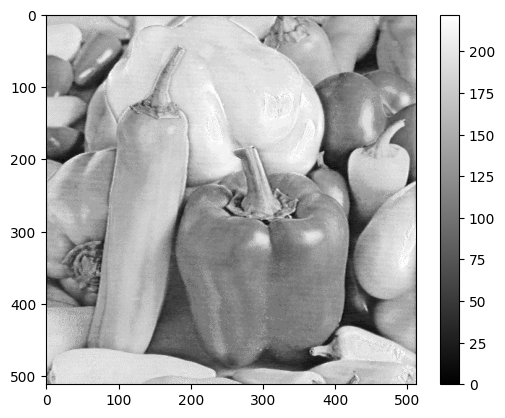

In [114]:
img = plt.imread('.\\Imagenes\\peppers_color.tif')

plt.imshow(img[:,:,0], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

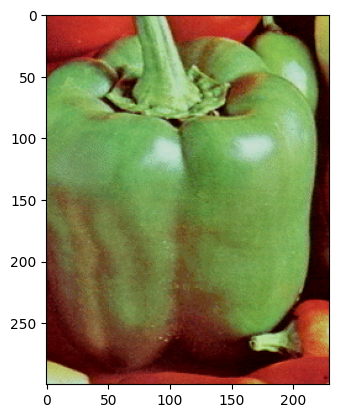

In [115]:
plt.imshow(img[200:500,200:430,:])

In [116]:
plt.imsave('peppers_color.jpg',img)

**4.7** Un formato de imágenes sin ningpun tipo de codificación se conoce como formato crudo (RAW). De la imagen _"rosa800x600.raw"_ lea y despliegue la imagen. Tome en cuenta que esta imagen maneja la precisión de integer8 y el tamaño es de 600x800 pixeles.

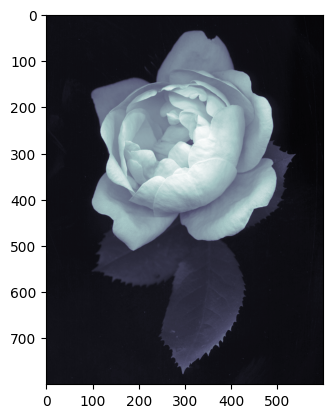

In [117]:
img = np.fromfile('.\\Imagenes\\rosa800x600.raw', dtype=np.uint8)
img = img.reshape((800,600))
plt.imshow(img, cmap=plt.cm.bone)
plt.show()

## 5. Ejercicios PARTE B Iris Setosa

**5.1** Cargue los datos iris en un _data frame (pandas)_ e imprima la descripción d elos datos (columnas y renglones), tipo y las 10 primeras filas de los datos.

In [118]:
import pandas as pd

data = pd.read_csv('.\\EjerciciosIris\\irisH.data')
data2 = pd.read_csv(f'.\\EjerciciosIris\\iris.data')

In [119]:
data = pd.concat([data,data2])

In [120]:
print(data.info())
print("-"*23)

print("First 10 rows:")
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  296 non-null    float64
 1   SepalWidth   299 non-null    float64
 2   PetalLength  300 non-null    float64
 3   PetalWidth   298 non-null    float64
 4   Class        300 non-null    object 
dtypes: float64(4), object(1)
memory usage: 14.1+ KB
None
-----------------------
First 10 rows:
   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          NaN         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.

**5.2** Imprima las llaves y el número de filas y de columnas.

In [121]:
print("Llaves: "+ str(data.columns.to_list()))

row, cols = data.shape
print("Numero de filas: " + str(row))
print("Numero de columnas: " + str(cols))

Llaves: ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
Numero de filas: 300
Numero de columnas: 5


**5.3** Imprima el número de muestras faltantes o NaN.

In [122]:
num_nan = data.isna().sum().sum()
print("Numero de muestras faltantes (NaN): "+ str(num_nan))

Numero de muestras faltantes (NaN): 7


**5.4** Cree un arreglo 2-D de tamaño 5x5 con unos en la diagonal y ceros en el resto. Convierta el arreglo NumPy a una matriz dispersa de ScyPy en formato CRS. _Nota: una matriz se considera dispersa cuando el porcentaje de ceros es mayor a 0.5._

In [123]:
import numpy as np

mat = np.zeros(shape=(5,5))
for i in range(0,5):
  for j in range(0,5):
    if i == j : 
      mat[i][j] = 1
    else:
      mat[i][j] = 0
mat

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [124]:
from scipy.sparse import csr_matrix


a = csr_matrix(mat)

print(a)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


**5.5** Muestre estadísticas básicas como percentil, media, mínimo, máximo y desviación estándar de los datos. Use _describe_ para ello. Imprima sólo la media y la desviación estándar.

In [125]:
data.describe().loc[['mean','std']]

SepalLength  SepalWidth  PetalLength  PetalWidth
mean     5.853041    3.052508     3.758667    1.201007
std      0.826914    0.432821     1.761467    0.762041

**5.6** Obtenga el número de muestras para cada clase.

In [126]:
data['Class'].value_counts()

Iris-setosa        100
Iris-versicolor    100
Iris-virginica     100
Name: Class, dtype: int64

**5.7** Añada un encabezado a los datos usando los nombres en `iris.names` y repita el ejercicio anterior.

**5.8** Imprima las diez primeras filas y las dos primeras columnas del _data frame_ usando los índices de las columnas.

In [127]:
data.iloc[:10,:2]

SepalLength  SepalWidth
0          NaN         3.5
1          4.9         3.0
2          4.7         3.2
3          4.6         3.1
4          5.0         3.6
5          5.4         3.9
6          4.6         3.4
7          5.0         3.4
8          4.4         2.9
9          4.9         3.1

### _VISUALIZACION: Utilizando matplotlib y/o seaborn_

**5.9.** Cree una gráfica de barras que muestre la media, mínimo y máximo de todos los datos.

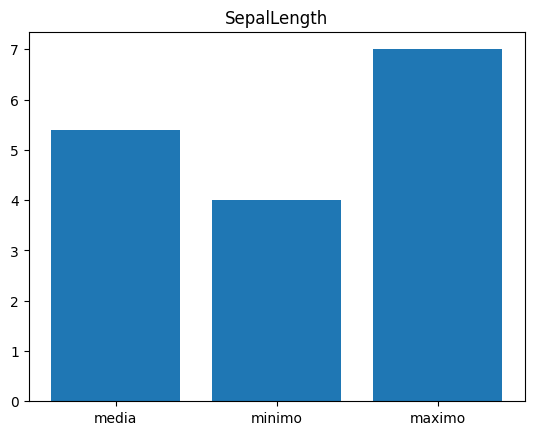

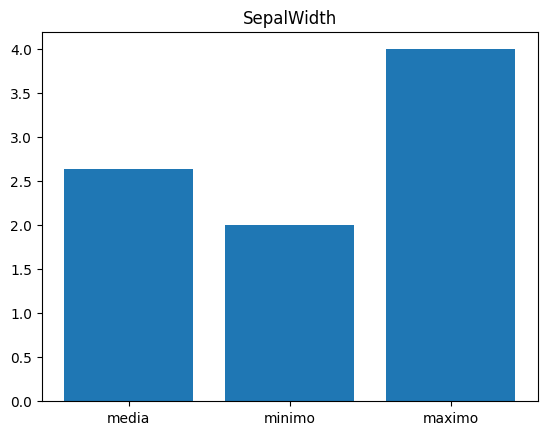

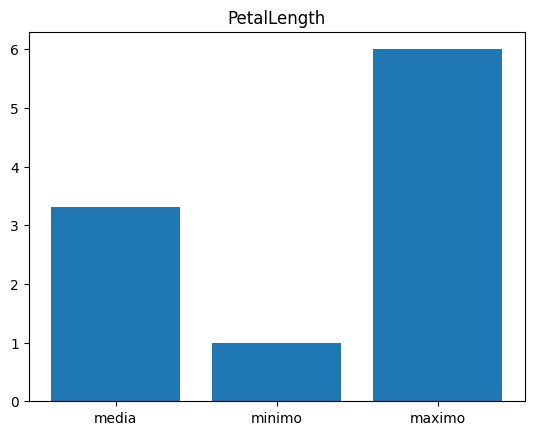

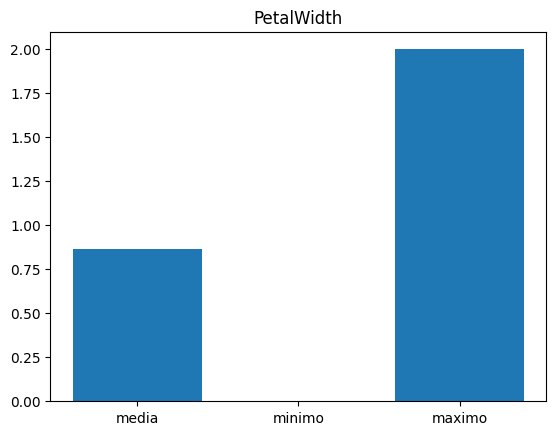

In [128]:
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
archivo= open('.\\EjerciciosIris\\irisH.data')

df=pd.read_csv(archivo)


ejex=['media','minimo','maximo']

for x in df.columns.tolist():
    aux=0
    data =[]
    if x=='Class':
        continue
    else:
        for y in range (len(df.columns.tolist())):
            for j in range(len(df)):
                if (str(df[x][j])!='nan'):
                    data.append(int(df[x][j]))
            aux+=1
        aux=0
        ejey=[ mean(data) , min(data), max(data)]
        plt.bar(ejex,ejey)
        plt.title(x)
        plt.show()

**5.10.** Muestre la frecuencia de las tres especies como una gráfica de pastel.

[50, 50, 50]


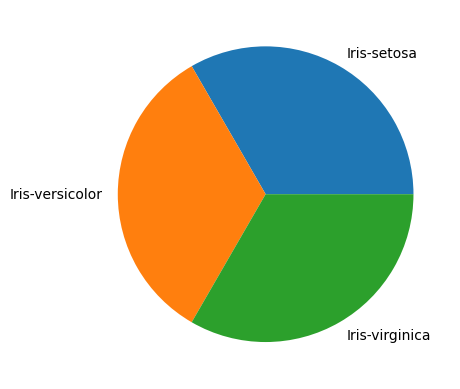

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

archivo=open('.\\EjerciciosIris\\irisH.data')
datos=pd.read_csv(archivo)

tipos=datos['Class'].value_counts().index.tolist()
valores=[]

for x in range(len(datos['Class'].value_counts())):
    valores.append(datos['Class'].value_counts()[x])
print(valores)

plt.pie(valores,labels=tipos)
plt.show()


**5.11.** Cree una gráfica que muestre la relación entre la longitud y ancho del sépalo de las tres especies conjuntamente.

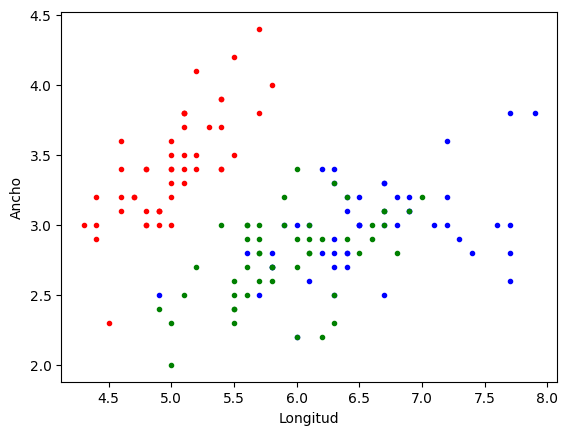

In [130]:
import matplotlib.pyplot as plt
import pandas as pd

archivo=open('.\\EjerciciosIris\\irisH.data')

df=pd.read_csv(archivo)
ejexS=[]
ejeyS=[]
ejexVe=[]
ejeyVe=[]
ejexVi=[]
ejeyVi=[]
aux=0


for x in range(len(df)):
     if str(df['SepalLength'][x])!='nan' and str(df['SepalWidth'][x])!='nan':
            if str(df['Class'][x]) == 'Iris-setosa':
                ejexS.append(df['SepalLength'][x])
                ejeyS.append(df['SepalWidth'][x])
            elif str(df['Class'][x]) == 'Iris-virginica':
                ejexVi.append(df['SepalLength'][x])
                ejeyVi.append(df['SepalWidth'][x])
            elif str(df['Class'][x]) == 'Iris-versicolor':
                ejexVe.append(df['SepalLength'][x])
                ejeyVe.append(df['SepalWidth'][x])


plt.plot(ejexS,ejeyS,'r.',ejexVi,ejeyVi,'b.',ejexVe,ejeyVe,'g.')
plt.xlabel("Longitud")
plt.ylabel("Ancho")
plt.show()

**5.12.** Obtenga los histogramas de las variables SepalLength, SepalWidth, PetalLength y PetalWidth.

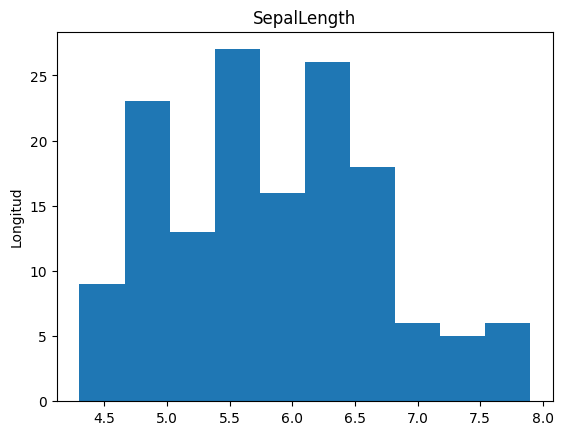

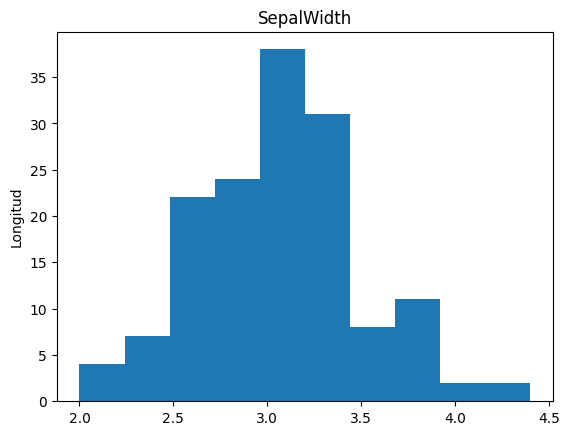

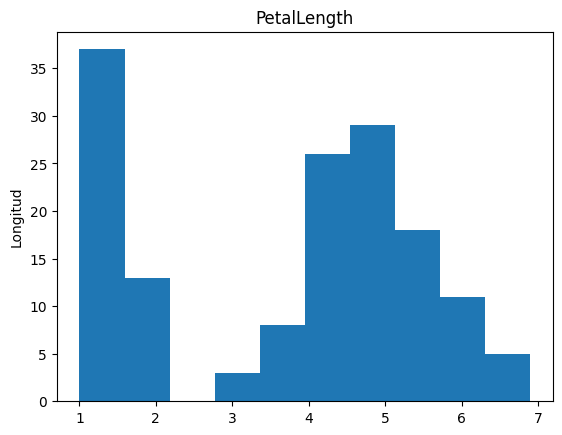

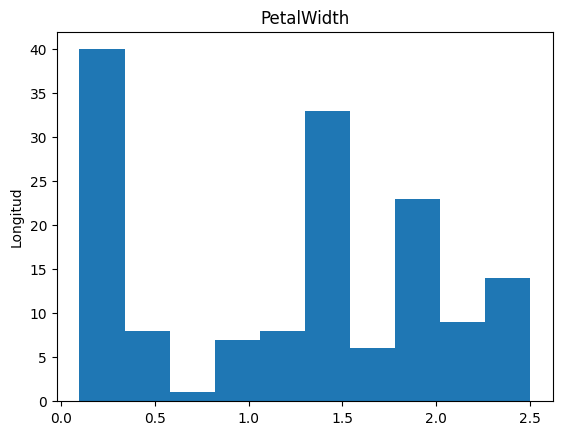

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

archivo=open('.\\EjerciciosIris\\irisH.data')

datos=pd.read_csv(archivo)
SepalL=[]
SepalW=[]
PetalL=[]
PetalW=[]

for x in range(len(datos)):
     if str(datos['SepalLength'][x])!='nan':
        SepalL.append(datos['SepalLength'][x])
     if str(datos['SepalWidth'][x])!='nan':
        SepalW.append(datos['SepalWidth'][x])
     if str(datos['PetalLength'][x])!='nan':
        PetalL.append(datos['PetalLength'][x])
     if str(datos['PetalWidth'][x])!='nan':
        PetalW.append(datos['PetalWidth'][x])



plt.hist(SepalL)
plt.title("SepalLength")
plt.ylabel("Longitud")
plt.show()
plt.hist(SepalW)
plt.title("SepalWidth")
plt.ylabel("Longitud")
plt.show()
plt.hist(PetalL)
plt.title("PetalLength")
plt.ylabel("Longitud")
plt.show()
plt.hist(PetalW)
plt.title("PetalWidth")
plt.ylabel("Longitud")
plt.show()

**5.13.** Cree gráficas de dispersión usando pairplot de seaborn y muestre con distintos colores las tres
especies en las gráficas de dispersión.

In [132]:
import pandas as pd

data = pd.read_csv('.\\EjerciciosIris\\irisH.data')


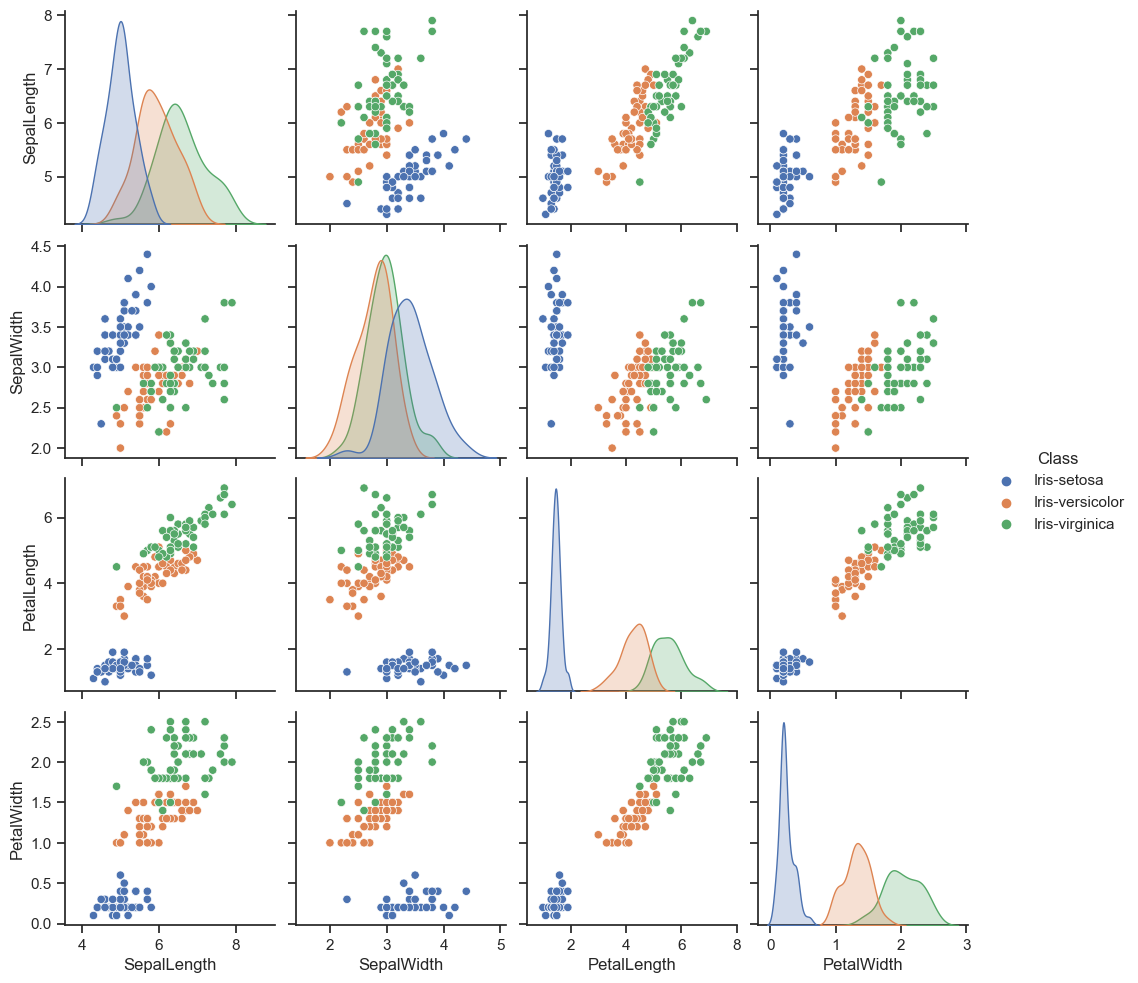

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data,hue='Class')
plt.show()

**5.14.** Cree una gráfica usando joinplot de seaborn para mostrar la dispersión entre la longitud y ancho del sépalo y las distribuciones de estas dos variables.

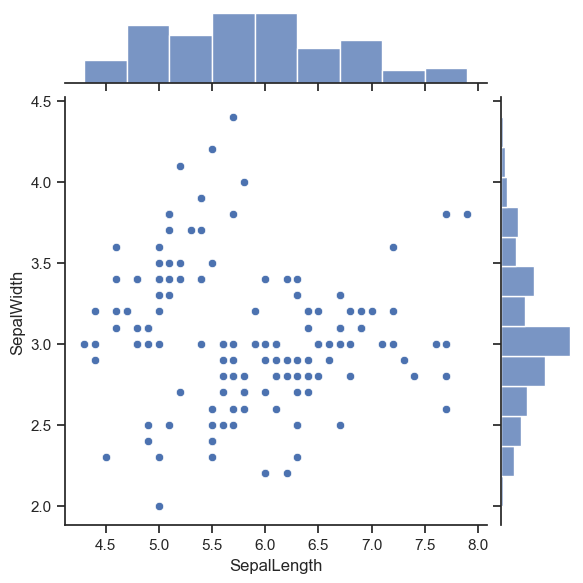

In [134]:
f = sns.jointplot(x="SepalLength",y="SepalWidth",data=data)
plt.show()

**5.15.** Repita el ejercicio anterior, pero esta vez usando joinplot con kind="hex".

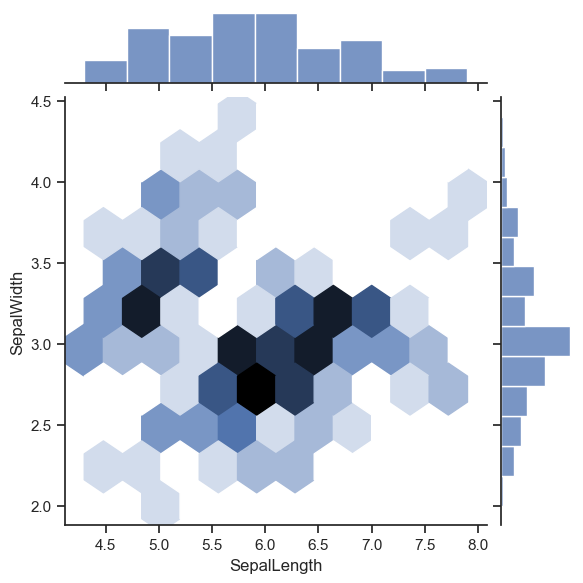

In [135]:
f = sns.jointplot(x="SepalLength",y="SepalWidth",data=data,kind="hex")
plt.show()